In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Salary_Data.csv')

# head() untuk menampilkan 5 data teratas
# df.head()

# info() untuk mengcek data ada berapa dan ada null
# df.info()

#describe() return decription of the data in the DataFrame
# df.describe()

# # 
# df['YearsExperience']

#
# df.columns

# index location (: = semua)
x = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [3]:
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

In [4]:
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [7]:
print(y_pred)
print(y_test)

[[41434.13316677]
 [74801.31604849]
 [83143.11176892]
 [69240.11890153]
 [72947.58366617]
 [65532.6541369 ]]
[[37731.]
 [66029.]
 [93940.]
 [61111.]
 [67938.]
 [57081.]]


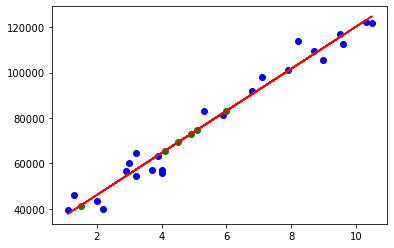

In [8]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, lr.predict(x_train), color='red')
plt.scatter(x_test, y_pred, color = 'green')
plt.show()

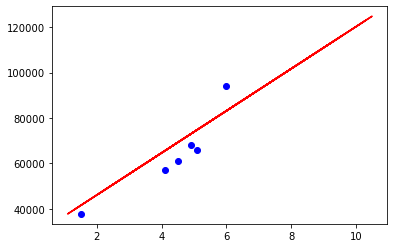

In [9]:
# Visualisasi data Testing
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_train, lr.predict(x_train), color='red') # Regresion Line
# plt.scatter(x_test, y_pred, color = 'green')
plt.show()

In [10]:
# https://scikit-learn.org/0.21/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_value = mean_absolute_error(y_test, y_pred)
mse_value = mean_squared_error(y_test, y_pred)
rmse_value = mean_squared_error(y_test, y_pred, squared = False)
r2_value = r2_score(y_test, y_pred)
print(f'Hasil dari MAE : {mae_value}')
print(f'Hasil dari MSE : {mse_value}')
print(f'Hasil dari RMSE : {rmse_value}')
print(f'Hasil dari R2 : {r2_value}')

Hasil dari MAE : 7477.115691823833
Hasil dari MSE : 61641413.308879755
Hasil dari RMSE : 7851.2045769346605
Hasil dari R2 : 0.7775083459037235


In [11]:
# Data startup 

df2 = pd.read_csv('50_Startups.csv')
# df2.head()
df2_drop = df2.copy()
df2_drop = df2_drop.drop('State', axis = 1)
df2_drop.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [13]:
x = df2_drop.iloc[:, :-1].values
y = df2_drop.iloc[:, -1].values

In [14]:
y = y.reshape(len(y), 1)
y.shape

(50, 1)

In [15]:
xm_train, xm_test, ym_train, ym_test = train_test_split(x,y, test_size= 0.2, random_state=50)

In [16]:
mlr = LinearRegression()
mlr.fit(xm_train, ym_train)

ym_pred = mlr.predict(xm_test)

In [17]:
gabung = np.concatenate((ym_test, ym_pred), axis = 1)
gabung

array([[ 96712.8       ,  85723.20720434],
       [ 90708.19      ,  71782.82357403],
       [191792.06      , 187778.99777284],
       [ 81229.06      ,  67022.7584117 ],
       [152211.77      , 150473.42861557],
       [126992.93      , 114826.981054  ],
       [ 96479.51      ,  88420.06912367],
       [134307.35      , 126005.31751045],
       [101004.64      , 101029.07536881],
       [108552.04      , 113478.21960058]])

In [18]:
r2_mlr = r2_score(ym_test, ym_pred)
print(r2_mlr)

# Column Transformers

0.9028338938059199


In [19]:
# Data startup 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd

df3 = pd.read_csv('50_Startups.csv')
# df3 = df[['State']]
# df3 = df.dropna()

transformer = make_column_transformer(
    (OneHotEncoder(), ['State']),
    remainder='passthrough')

transformed = transformer.fit_transform(df3)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
print(transformed_df.head())

# df2.head()
# df2_drop = df2.copy()
# df2_drop = df2_drop.drop('State', axis = 1)
# ohe = OneHotEncoder()

# df3.head()

   onehotencoder__x0_California  onehotencoder__x0_Florida  \
0                           0.0                        0.0   
1                           1.0                        0.0   
2                           0.0                        1.0   
3                           0.0                        0.0   
4                           0.0                        1.0   

   onehotencoder__x0_New York  R&D Spend  Administration  Marketing Spend  \
0                         1.0  165349.20       136897.80        471784.10   
1                         0.0  162597.70       151377.59        443898.53   
2                         0.0  153441.51       101145.55        407934.54   
3                         1.0  144372.41       118671.85        383199.62   
4                         0.0  142107.34        91391.77        366168.42   

      Profit  
0  192261.83  
1  191792.06  
2  191050.39  
3  182901.99  
4  166187.94  


In [20]:
x2 = transformed_df.iloc[:, :-1].values
y2 = transformed_df.iloc[:, -1].values

In [21]:
y2 = y2.reshape(len(y2), 1)
y2.shape

(50, 1)

In [22]:
xm2_train, xm2_test, ym2_train, ym2_test = train_test_split(x2,y2, test_size= 0.2, random_state=50)

In [23]:
mlr2 = LinearRegression()
mlr2.fit(xm2_train, ym2_train)

ym2_pred = mlr2.predict(xm2_test)

In [24]:
gabung2 = np.concatenate((ym2_test, ym2_pred), axis = 1)
gabung2

array([[ 96712.8       ,  84457.16115252],
       [ 90708.19      ,  72543.44544734],
       [191792.06      , 186070.97934498],
       [ 81229.06      ,  67431.79651296],
       [152211.77      , 150237.4771915 ],
       [126992.93      , 113635.43439889],
       [ 96479.51      ,  88703.00224459],
       [134307.35      , 124781.17620402],
       [101004.64      , 101217.77951759],
       [108552.04      , 113863.68825244]])

In [25]:
r2_mlr2 = r2_score(ym2_test, ym2_pred)
print(r2_mlr2)

0.897134285307714
